### Librerias

In [173]:
#importo librerias
import pandas as pd
import re
import numpy as np
import missingno as msno
import re

In [174]:
#Listas de valores nulos
common_na_strings = ["missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",]

common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

# Camaras


### Carga CSV

In [175]:
#Lecturas de csv de camaras
camaras = pd.read_csv("../datos/csv brutos/2022_madrid_camaras_viapublica.csv",  encoding='iso-8859-1', index_col=0)

In [176]:
camaras.sample(3, random_state=5)

,PK,NOMBRE,TRANSPORTE,ACCESIBILIDAD,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,LOCALIDAD,CODIGO-POSTAL,COD-BARRIO,BARRIO,COD-DISTRITO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD,TELEFONO
34,6273905,Juzgados de lo Penal. Calle AlbarracÃ¯Â¿Â½n,Metro: Ascao (lÃ¯Â¿Â½nea 7) / GarcÃ¯Â¿Â½a Nobl...,3,ALBARRACIN,CALLE,V,31,MADRID,28037,1,SIMANCAS,20,SAN BLAS-CANILLEJAS,446428,4476044,40.433319,-3.631605,Ver pestaÃ¯Â¿Â½a MÃ¯Â¿Â½s informaciÃ¯Â¿Â½n
29,7613531,Juzgado de Guardia. Plaza de Castilla,"Metro: Plaza de Castilla (lÃ¯Â¿Â½neas 1, 9 y 1...",3,CASTILLA,PLAZA,V,1,MADRID,28046,3,CASTILLEJOS,6,TETUAN,441486,4479615,40.465150,-3.690203,Ver pestaÃ¯Â¿Â½a MÃ¯Â¿Â½s informaciÃ¯Â¿Â½n
45,5378170,Registro Civil Central. Servicio de Certificados,"Metro: Sol (lÃ¯Â¿Â½neas 1, 2, 3), Gran VÃ¯Â¿Â½...",3,MONTERA,CALLE,V,18,MADRID,28013,6,SOL,1,CENTRO,440394,4474380,40.417913,-3.702591,902 007 214


### Modificacion columnas

In [177]:
#Lista con nombre de columnas que deben ser borradas
columnas_camaras = ['COD-DISTRITO', 'COD-BARRIO', 'TRANSPORTE', 'TIPO-NUM', 'COD-DISTRITO', 'COD-BARRIO']
#Si la columna se encuentra en al df, la elimino
camaras = camaras.drop(columnas_camaras, axis = 1)

In [178]:
#Renombro las columnas de mayuscula a minuscula
camaras.rename(
    columns={
        'LOCALIDAD':'camaras_localidad',
        'LONGITUD':'camaras_longitud',
        'LATITUD':'camaras_latitud',
        'NUM' : 'camaras_via_numero',
        'CODIGO-POSTAL' : 'camaras_codigo_postal',
        'BARRIO': 'camaras_barrio',
        'PK':'camaras_pk', 
        'DISTRITO':'camaras_distrito',
        'ACCESIBILIDAD':'camaras_accesibilidad',
        'TELEFONO':'camaras_propietario_telefono',
        'COORDENADA-X':'camaras_coordenada_utm_x', 
        'COORDENADA-Y':'camaras_coordenada_utm_y', 
        'NOMBRE':'camaras_propietario', 
        'NOMBRE-VIA':'camaras_via_nombre', 
        'CLASE-VIAL':'camaras_via_clase'}
        , inplace=True)

In [179]:
#Se coloca la columna con valores unicos (PK), como indice
camaras.set_index('camaras_pk', inplace = True, verify_integrity=True)

### Valores

### Limpieza de valores con simbolos extraños


In [180]:
# Aplicar la función a la columna 'texto_columna'
camaras['camaras_propietario_telefono'] = camaras['camaras_propietario_telefono'].apply(lambda numero: ''.join(re.findall(r'\d{2,12}', numero)))
camaras['camaras_propietario'] = camaras['camaras_propietario'].apply(lambda propietario: ''.join(re.findall(r'[[\w]*[\s]?]*', propietario))).apply(lambda propietario: re.sub(r'[Â½]*[Â½]?', '', propietario))
camaras['camaras_via_nombre'] = camaras['camaras_via_nombre'].apply(lambda nombre_via: ''.join(re.sub(r'[a-z]*', '', nombre_via)))

In [181]:
#Conversion de los valores de la columna "propietario" a mayusculas
camaras.camaras_propietario = camaras.camaras_propietario.str.upper()

### Remplazo Na

In [182]:
#Se elige el df de camaras
camaras = camaras.replace(
        to_replace=common_na_strings, #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    ).replace(
        to_replace=common_na_numbers, #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )

In [183]:
# Agregar columna independiente de valores faltantes en columnas importantes
valores_a_revisar = ['camaras_propietario', 'camaras_via_nombre', 'camaras_via_clase', 'camaras_distrito', 'camaras_coordenada_utm_x', 'camaras_coordenada_utm_y']

# Aplicar la actualización
camaras['camaras_relevantes_faltantes'] = np.where(camaras[valores_a_revisar].isna().any(axis=1), 'REVISAR', 'COMPLETO')

In [184]:
camaras.loc[camaras['camaras_relevantes_faltantes']=='REVISAR']

,camaras_propietario,camaras_accesibilidad,camaras_via_nombre,camaras_via_clase,camaras_via_numero,camaras_localidad,camaras_codigo_postal,camaras_barrio,camaras_distrito,camaras_coordenada_utm_x,camaras_coordenada_utm_y,camaras_latitud,camaras_longitud,camaras_propietario_telefono,camaras_relevantes_faltantes
camaras_pk,,,,,,,,,,,,,,,
7612756,FISCALÃA VIOLENCIA FAMILIAR,3,ALBARRACIN,NaN,31.0,MADRID,28037,SIMANCAS,SAN BLAS-CANILLEJAS,446428,4476044,40.433319,-3.631605,914932422914933111,REVISAR


In [185]:
camaras.sample(3, random_state=5)

,camaras_propietario,camaras_accesibilidad,camaras_via_nombre,camaras_via_clase,camaras_via_numero,camaras_localidad,camaras_codigo_postal,camaras_barrio,camaras_distrito,camaras_coordenada_utm_x,camaras_coordenada_utm_y,camaras_latitud,camaras_longitud,camaras_propietario_telefono,camaras_relevantes_faltantes
camaras_pk,,,,,,,,,,,,,,,
6273905,JUZGADOS DE LO PENAL CALLE ALBARRACÃN,3,ALBARRACIN,CALLE,31.0,MADRID,28037,SIMANCAS,SAN BLAS-CANILLEJAS,446428,4476044,40.433319,-3.631605,NaN,COMPLETO
7613531,JUZGADO DE GUARDIA PLAZA DE CASTILLA,3,CASTILLA,PLAZA,1.0,MADRID,28046,CASTILLEJOS,TETUAN,441486,4479615,40.465150,-3.690203,NaN,COMPLETO
5378170,REGISTRO CIVIL CENTRAL SERVICIO DE CERTIFICADOS,3,MONTERA,CALLE,18.0,MADRID,28013,SOL,CENTRO,440394,4474380,40.417913,-3.702591,902007214,COMPLETO


In [186]:
#sumo los valores nulos por columna
camaras.isnull().sum()

camaras_propietario              0
camaras_accesibilidad            0
camaras_via_nombre               0
camaras_via_clase                1
camaras_via_numero               2
camaras_localidad                0
camaras_codigo_postal            0
camaras_barrio                   0
camaras_distrito                 0
camaras_coordenada_utm_x         0
camaras_coordenada_utm_y         0
camaras_latitud                  0
camaras_longitud                 0
camaras_propietario_telefono    18
camaras_relevantes_faltantes     0
dtype: int64

<AxesSubplot:>

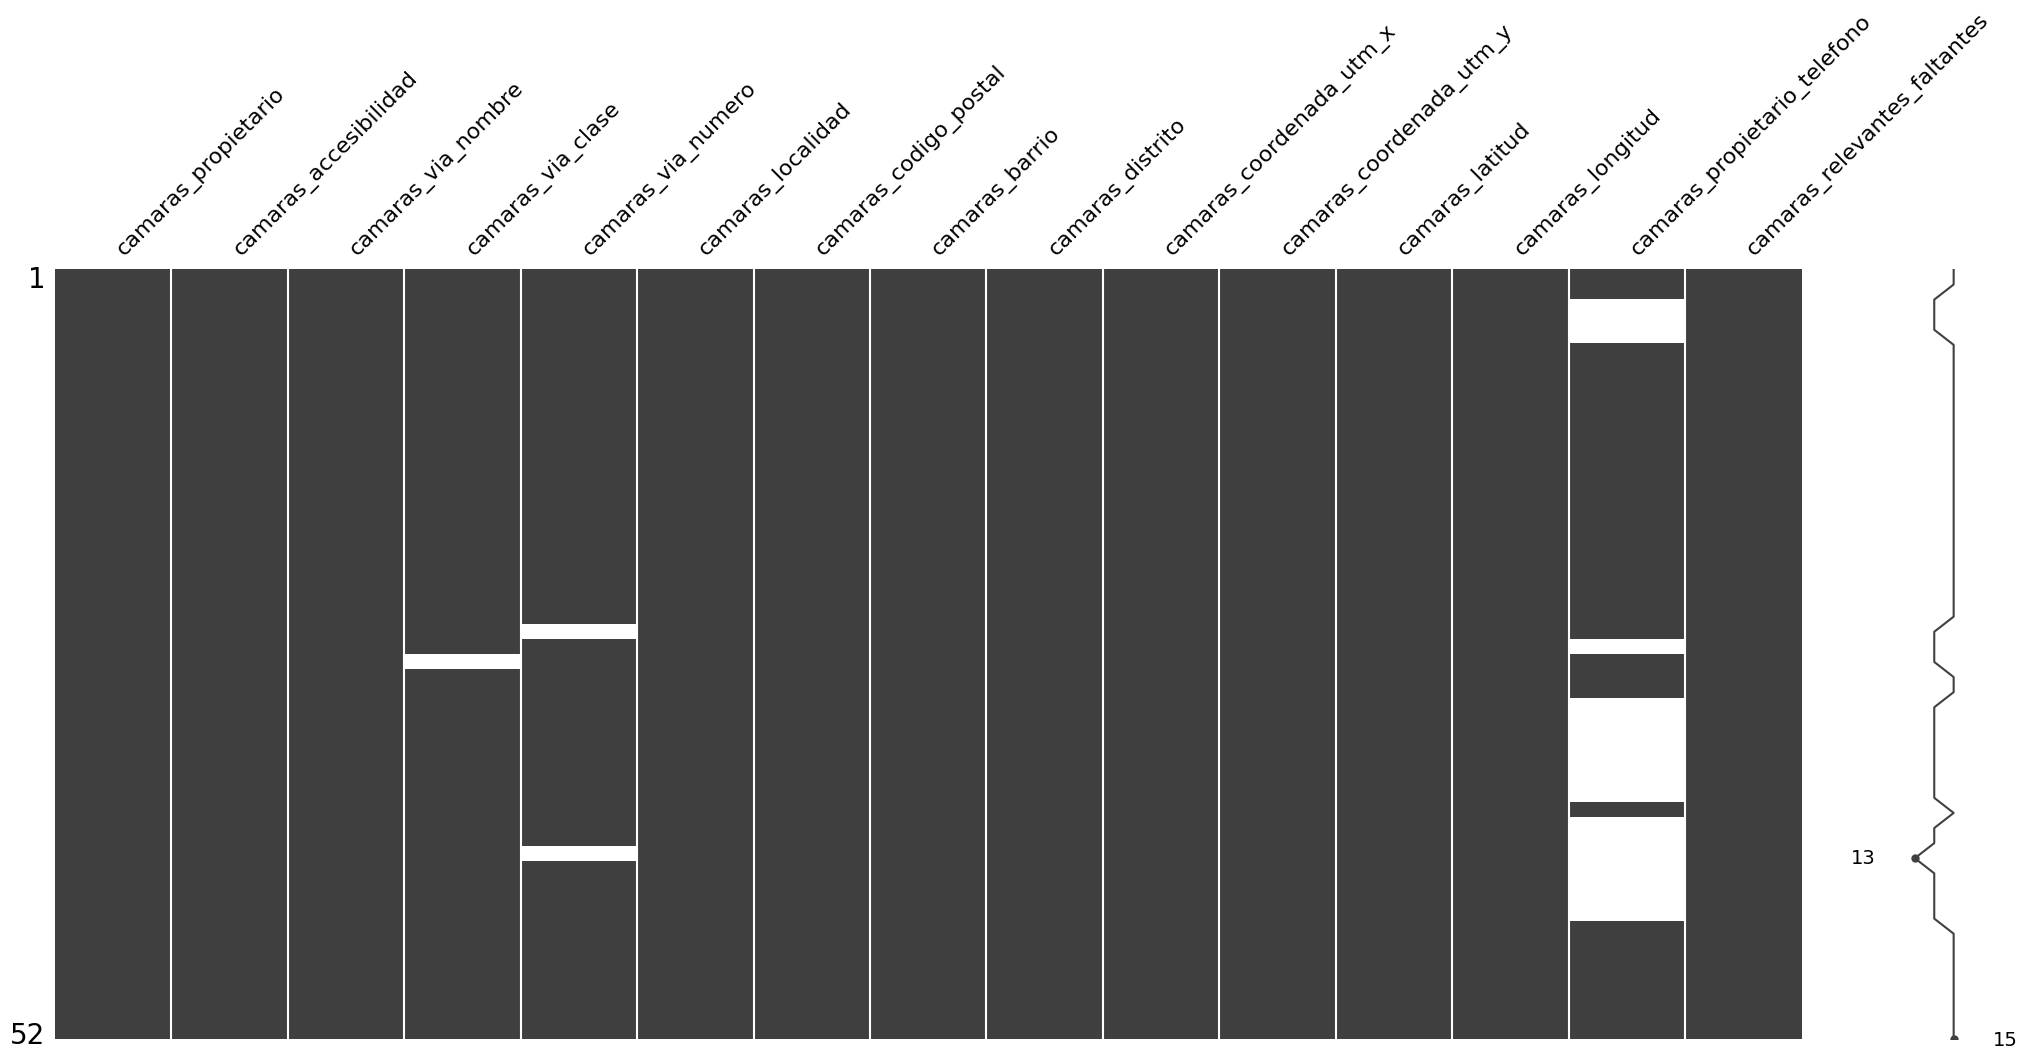

In [187]:
#matriz de valores nulos
msno.matrix(camaras)

### Guardado de CSV

In [188]:
#Reordeno las columnas en su estado final
camaras = camaras.reindex(columns=['camaras_codigo_postal', 'camaras_distrito', 'camaras_localidad','camaras_barrio', 'camaras_via_clase', 'camaras_via_nombre', 'camaras_via_numero','camaras_latitud', 'camaras_longitud','camaras_coordenada_utm_x', 'camaras_coordenada_utm_y', 'camaras_accesibilidad', 'camaras_propietario', 'camaras_propietario_telefono',  'camaras_relevantes_faltantes'])

In [189]:
camaras.to_csv('../datos/csv procesados/2022_madrid_camaras.csv', index=True)

In [190]:
camaras.to_excel('../datos/csv procesados/2022_madrid_camaras.xlsx', index=True)

# Accidentes


### Lectura CSV

In [191]:
#Lectura de csv de accidentes
accidentes = pd.read_csv('../datos/csv brutos/2022_madrid_accidentalidad.csv', encoding='iso-8859-1', sep=';', index_col=0)

In [192]:
accidentes.sample(3, random_state=3)

,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorolÃ³gico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,Unnamed: 19,Unnamed: 20
ï»¿num_expediente,,,,,,,,,,,,,,,,,,,,
2022S002052,30/01/2022,3:05:00,AVDA. ARCENTALES / CALL. ESTOCOLMO,80,20,SAN BLAS-CANILLEJAS,ColisiÃ³n fronto-lateral,Despejado,Turismo,Conductor,De 25 a 29 aÃ±os,Hombre,NaN,NaN,"449058,135","4475986,961",N,NaN,NaN,NaN
2022S002413,03/02/2022,11:35:00,"CALL. CLARA DEL REY, 23",23,5,CHAMARTÃN,ColisiÃ³n fronto-lateral,Despejado,Motocicleta hasta 125cc,Conductor,De 45 a 49 aÃ±os,Hombre,7.0,Asistencia sanitaria sÃ³lo en el lugar del acc...,"443001,168","4476940,609",N,NaN,NaN,NaN
2022S020438,01/07/2022,19:50:00,"CALL. VIA LUSITANA, 56",56,11,CARABANCHEL,Atropello a persona,Despejado,Motocicleta > 125cc,Conductor,De 35 a 39 aÃ±os,Hombre,14.0,Sin asistencia sanitaria,"438438,646","4470264,199",N,NaN,NaN,NaN


### Modificando columnas

In [193]:
#renombro algunas columnas
accidentes.rename(columns={'distrito':'accidentes_distrito', 'hora':'accidentes_hora', 'ï»¿num_expediente': 'accidentes_numero_expediente','localizacion':'accidentes_via_nombre','numero':'accidentes_via_numero', 'coordenada_x_utm':'accidentes_longitud', 'coordenada_y_utm':'accidentes_latitud'}, inplace=True)

In [194]:
#lista de columnas inecesarias
accidentes = accidentes.drop(['cod_distrito','fecha', 'tipo_vehiculo', 'tipo_persona', 'positiva_alcohol', 'positiva_droga', 'Unnamed: 19', 'Unnamed: 20', 'lesividad', 'cod_lesividad', 'sexo', 'rango_edad', 'estado_meteorolÃ³gico', 'tipo_accidente'], axis=1)

In [195]:
accidentes['accidentes_localidad'] = 'Madrid'

### Valores

In [196]:
accidentes.sample(3, random_state=2)

,accidentes_hora,accidentes_via_nombre,accidentes_via_numero,accidentes_distrito,accidentes_longitud,accidentes_latitud,accidentes_localidad
ï»¿num_expediente,,,,,,,
2022S023892,7:40:00,CALL. DULCE CHACON / CMNO. FUENTE DE LA MORA,15,HORTALEZA,"443820,082","4481706,275",Madrid
2022S000481,20:15:00,CALL. VELAZQUEZ / CALL. JOAQUIN COSTA,146,CHAMARTÃN,"442106,722","4477104,944",Madrid
2022S017784,21:45:00,"AVDA. DEMOCRACIA, 3",3,PUENTE DE VALLECAS,"446937,294","4470421,422",Madrid


In [197]:
#Lista con algunas abreviaturas utilizadas para referirse al tipo de via
lista_tipo_calle = ['AVDA', 'PLAZA', 'CALL', 'AUTOV', 'CMNO', 'PASEO', 'RONDA', 'AEROP', 'PQUE', 'METRO','AVENIDA', 'PSAJE', 'BULEV', 'PUENTE', 'CALLE', 'CORREGIDOR', 'ESQUINA', 'PNTE', 'ACCES', 'AV','TUNELES', 'CAMINO', 'CALZADA', 'CRUCE', 'CONFLUENCIA', 'AEROPUERTO','TUNEL', 'PARKING','CARRETERA', 'AUTOVA', 'calle', 'TERMINAL','avda', 'AUTOVIA', 'INCORPORACIN', 'HOSPI', 'SubterrÃ', 'SUBTERRANEO', 'PARQUE', 'Carretera', 'Calle', 'CUARTEL', 'INCORPORA', 'PASO', 'antonio', 'MODESTO','ESTAD', 'PTA', 'MONASTERIO', 'HACIENDA', 'ACCESO','HOSPITAL', 'ESTACION', 'Acceso','PASARELA','AVENIDAD','Calzada', 'Pasarela', 'paseo', 'serrano','RAMAL','PINAR']
#Si la primer palabra de la columna "nombre_via" esta dentro de la lista con abreviaturas de los tipos de vias, la copio a una nueva columna
accidentes['accidentes_via_tipo'] = accidentes['accidentes_via_nombre'].apply(lambda texto: re.match(r'\b\w+\b', texto).group() if re.match(r'\b\w+\b', texto) and re.match(r'\b\w+\b', texto).group() in lista_tipo_calle else None)

In [198]:
#elimino la la abreviatura del tipo de via de la columna "nombre_via"
accidentes['accidentes_via_nombre'] = accidentes['accidentes_via_nombre'].apply(lambda texto: re.sub(r'^[^\w]*\w+\s*\.*\s*', '', texto) if re.match(r'\b\w+\b', texto) and re.match(r'\b\w+\b', texto).group() in lista_tipo_calle else texto)
#Dejo solo la primer via, dentro de la columna "nombre_via"
accidentes['accidentes_via_nombre'] = accidentes['accidentes_via_nombre'].apply(lambda texto: texto.split(',')[0].split('/')[0])
#Remplazo simbolos extraños por un caracter vacio: ""
accidentes['accidentes_via_nombre'] = accidentes['accidentes_via_nombre'].apply(lambda texto: re.sub(r'^[^\w\d]*\b', '', texto))
#Elimino simbolos extraños de la columna de "numero", quedandome solo con los valores numericos despues de cero y antes de letras
accidentes['accidentes_via_numero'] = accidentes['accidentes_via_numero'].apply(lambda numero: re.match(r'\+?0*(\d+)', numero).group(1))
#Reasignando nombre de distritos
accidentes['accidentes_distrito'].loc[accidentes['accidentes_distrito'] == 'CHAMBERÃ\x8d'] = 'CHAMBERI'
accidentes['accidentes_distrito'].loc[accidentes['accidentes_distrito'] == 'TETUÃ\x81N'] = 'TETUAN'
accidentes['accidentes_distrito'].loc[accidentes['accidentes_distrito'] == 'VICÃ\x81LVARO'] = 'VICALVARO'
accidentes['accidentes_distrito'].loc[accidentes['accidentes_distrito'] == 'CHAMARTÃ\x8dN'] = 'CHAMARTIN'

In [199]:
# Define un diccionario que mapea posibles valores a tipos de vía
mapeo_tipo_via = {
    'Calle': ['PARKING', 'ESQUINA', 'CMNO', 'CALLE', 'Calle', 'CAMINO', 'CALL', 'calle', 'PSAJE'],
    'Espacio verde': ['PASEO', 'PLAZA', 'PARQUE', 'HACIENDA', 'paseo', 'serrano', 'PQUE'],
    'Avenida': ['AVDA', 'CONFLUENCIA', 'AVENIDA', 'BULEV', 'AV', 'avda', 'AVENIDAD', 'RONDA'],
    'Carretera': ['TUNEL', 'CORREGIDOR', 'ACCES', 'CALZADA', 'METRO', 'INCORPORACIN', 'AUTOVIA', 'TUNELES', 'AUTOVA', 'RAMAL', 'PINAR', 'ACCESO', 'Acceso', 'Calzada', 'Carretera', 'INCORPORA', 'PASO', 'PASARELA', 'CRUCE', 'Pasarela', 'SubterrÃ', 'SUBTERRANEO', 'AUTOV'],
    'Empresa': ['ESTACION'],
    'Institucion': ['HOSPITAL', 'TERMINAL', 'HOSPI', 'CUARTEL', 'AEROP', 'AEROPUERTO', 'CARRETERA', 'MONASTERIO'],
    'Puente': ['PNTE', 'PUENTE']
}

# Aplica el mapeo a la columna 'tipo_via' directamente desde la lambda
accidentes['accidentes_via_tipo'] = accidentes['accidentes_via_tipo'].apply(lambda valor: next((tipo for tipo, valores in mapeo_tipo_via.items() if valor in valores), valor))

In [200]:
#lista definidos
lista_lugar = ['Puente', 'Institucion', 'Empresa', 'Carretera', 'Avenida', 'Espacio verde', 'Calle']
#Si el tipo de via no esta en la lista predefinia se le asigna "none"
accidentes.loc[~accidentes['accidentes_via_tipo'].isin(lista_lugar), 'accidentes_via_tipo'] = None

In [201]:
#Conversion de columna tipo_via a mayuscula
accidentes.accidentes_via_tipo = accidentes.accidentes_via_tipo.str.upper()

In [202]:
accidentes['accidentes_hora'] = pd.to_datetime(accidentes['accidentes_hora'], format='%H:%M:%S').dt.hour

In [203]:
accidentes.sample(3, random_state  = 4)

,accidentes_hora,accidentes_via_nombre,accidentes_via_numero,accidentes_distrito,accidentes_longitud,accidentes_latitud,accidentes_localidad,accidentes_via_tipo
ï»¿num_expediente,,,,,,,,
2022S010673,16,JESUITAS,19,LATINA,"437972,335","4473561,647",Madrid,ESPACIO VERDE
2022S040415,19,TIENDA CHINA MR. CASA,4,VICALVARO,"449680,541","4472715,536",Madrid,CALLE
2022S015840,12,M-30,800,RETIRO,"443740,972","4473619,097",Madrid,CARRETERA


In [204]:
diccionario_distritos = {
    'PUENTE DE VALLECAS' : 28053, 
    'RETIRO': 28032, 
    'CENTRO': 28042, 
    'SAN BLAS-CANILLEJAS': 28022,
    'USERA': 28026, 
    'CHAMBERI': 28003, 
    'MORATALAZ': 28030, 
    'LATINA': 28024, 
    'HORTALEZA': 28033,
    'ARGANZUELA': 28005, 
    'CARABANCHEL': 28032, 
    'TETUAN':28020, 
    'CIUDAD LINEAL': 28017,
    'VILLAVERDE': 28021, 
    'SALAMANCA': 28001, 
    'VICALVARO':28028, 
    'FUENCARRAL-EL PARDO':28029,
    'VILLA DE VALLECAS':28053, 
    'CHAMARTIN':28036, 
    'MONCLOA-ARAVACA': 28008, 
    'BARAJAS':28042
}

def cod_postal(valor):
    return diccionario_distritos[valor]

In [205]:
accidentes['accidentes_distrito_codigo_postal'] = accidentes['accidentes_distrito'].apply(cod_postal)

In [206]:
def long_lat(valor):
    try:
        valor = re.sub(r'(\d+),(\d+)$', r'\1.\2', valor)
        valor = float(valor)
    except:
        valor = np.nan
    
    return valor

def utm_to_geographic(utm_value):
    return (utm_value - 500000) / 0.9996 / 6378137 * (180 / 3.141592653589793)

def utm_to_latitud(utm_value):
    return (utm_value / 0.9996 - 6148000) / 6378137 * (180 / 3.141592653589793)

# Convertir las columnas de cadena a números
accidentes['accidentes_longitud'] = accidentes['accidentes_longitud'].apply(long_lat)
accidentes['accidentes_latitud'] = accidentes['accidentes_latitud'].apply(long_lat)

# Aplicar las funciones de conversión a las columnas en el DataFrame
accidentes['accidentes_longitud'] = accidentes['accidentes_longitud'].apply(utm_to_geographic)
accidentes['accidentes_latitud'] = accidentes['accidentes_latitud'].apply(utm_to_latitud)


In [213]:
#Se copia latitudes y longitudes del csv de camaras

distritos = camaras.camaras_distrito.unique()

accidentes.loc[accidentes['accidentes_distrito'].isin(distritos), 'accidentes_longitud'] = \
    camaras['camaras_longitud']

accidentes.loc[accidentes['accidentes_distrito'].isin(distritos), 'accidentes_latitud'] = \
    camaras['camaras_latitud']

### Remplazo de Na

In [207]:
#Remplazo de valores nulos por "nan" de numpy
accidentes = accidentes.replace(
        to_replace=common_na_strings, #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    ).replace(
        to_replace=common_na_numbers, #Se le pasa el filtro de elementos que se tomaran como nulos/na
        value=np.nan #Este esl valor que tomaran todos los elementos que considan con el filtro
    )

In [208]:
#Suma de valores nulos por columna
accidentes.isna().sum()

accidentes_hora                         0
accidentes_via_nombre                  18
accidentes_via_numero                   0
accidentes_distrito                     0
accidentes_longitud                    10
accidentes_latitud                     10
accidentes_localidad                    0
accidentes_via_tipo                  2714
accidentes_distrito_codigo_postal       0
dtype: int64

In [209]:
columnas_obligatorias = ['accidentes_hora', 'accidentes_via_nombre', 'accidentes_distrito', 'accidentes_longitud', 'accidentes_latitud']
accidentes['accidentes_relevantes_faltantes'] = np.where(accidentes[columnas_obligatorias].isna().any(axis=1), 'REVISAR', 'COMPLETO')

<AxesSubplot:>

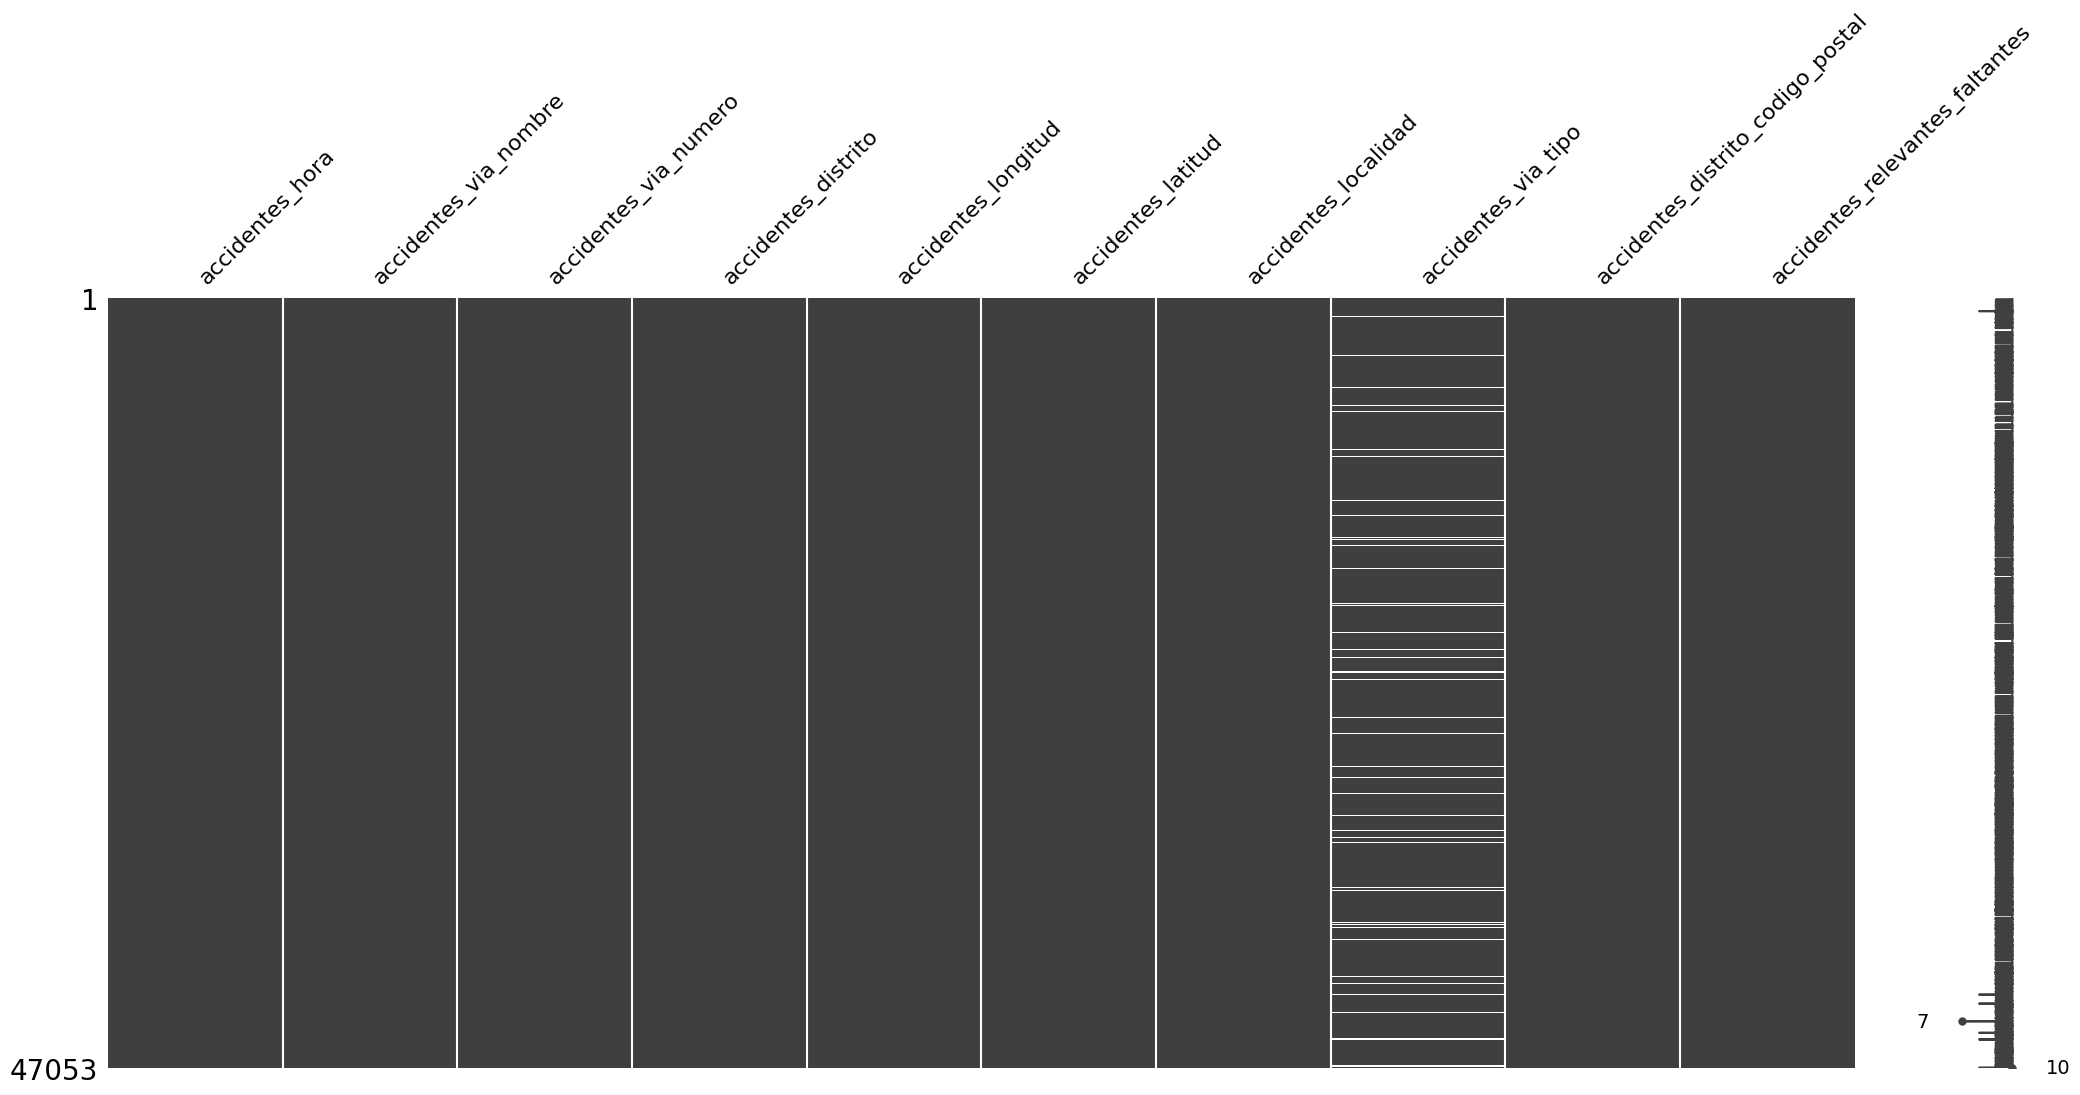

In [210]:
#Matriz de valores nulos
msno.matrix(accidentes)

### Guardado de CSV

In [211]:
#Reordeno las columnas en su estado final
accidentes = accidentes.reindex(columns=['accidentes_numero_expediente', 'accidentes_hora', 'accidentes_localidad','accidentes_distrito_codigo_postal','accidentes_distrito','accidentes_via_tipo','accidentes_via_nombre','accidentes_via_numero', 'accidentes_longitud', 'accidentes_latitud','accidentes_relevantes_faltantes'])

In [212]:
accidentes.to_csv('../datos/csv procesados/2022_madrid_accidentalidad.csv', index=True)
accidentes.to_excel('../datos/csv procesados/2022_madrid_accidentalidad.xlsx', index=True)

## Conclucion:

Se observo una distrivucion de valores nulos, pero solo sobre columnas que no tienen relacion directa ni influencia mayor sobre las columnas que se quiere realizar el analisis por lo que se dejaron sin eliminar.